In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def plot_evol(GPU, N, time):
    
    plt.figure(figsize=(12,6))
    plt.loglog(GPU, [(t[0][0]*(GPU[0]*GPU[0]))*c**(-2) for c in GPU], '--', label=r"ORDER 2")
    for i,t in enumerate(time):
        plt.loglog(GPU, t, 'o-', label=f"Grid N={N[i]}")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Execution time (s)")
    plt.title("Execution time of Jacobi solver using $make cub$")
    plt.grid(True, which="both")
    plt.legend()
    plt.show()

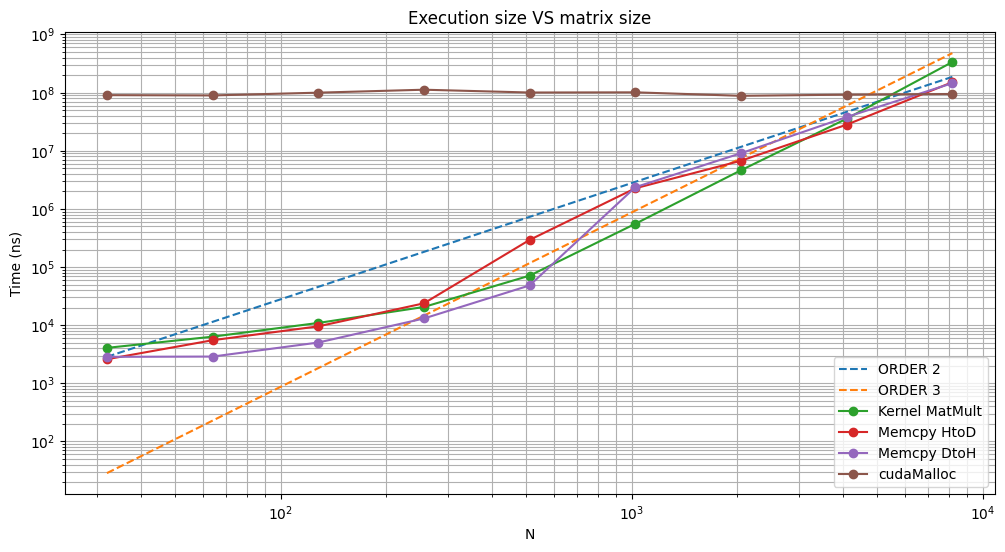

In [21]:
GPU = [1,2,4,8,16,32]
N = [8192, 16384, 32768]
time = [[]]

plot_evol(GPU, N, time)

hello yeah don't bother what's inside it's unrelated

/tmp/ipykernel_9937/1175337026.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( title ="nu")


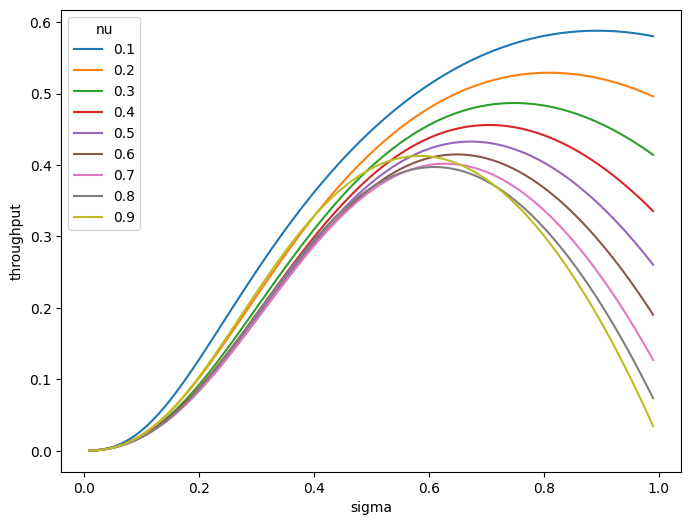

In [5]:
import pandas as pd, numpy as np
import matplotlib , matplotlib . pyplot as plt

def throughput(s , n):
    return (2*(1-s)*s + (s+n-2*s*n)*(2-2*n) + 2*(1-n)*n*(1-s)*(2*n-2*n*n)) / (3-2*n+(2-2*n)*((1-s)/(s*s)*n))
    
data = pd.DataFrame()
sl = np.arange (0.01, 1, 0.01)
for n in np.arange (0.1, 1, .1) :
    data = pd.concat([ data , pd.DataFrame({"nu": n, "sigma": sl , "throughput":[ throughput(s , n) for s in sl ]}) ])
    
fig , ax = plt.subplots(figsize =(8,6))
plt.legend( title ="nu")
plt.ylabel("throughput")
for label , df in data.groupby("nu"):
    df.plot(x="sigma", y="throughput", ax=ax, label =round(label, 1))
plt.show()